# REVENUE DEVELOPMENT IN RESTAURANT INDUSTRY

- Restaurant Industry is one of the biggest revenue generating industries of the world. Revenue from the restaurant industry was estimated at  USD 799 Billions with 4.3% rise than the previous year which shows that restaurant trend has no near end. But, still we see that not all the restaurants shine in the market. There are a lot of restaurants which closes within an year of their opening.
- What do you think is the major reason behind the failure of any restaurant?
- Yes, it's the poor analytics !
- You can save your restaurant just by the good analysis which can help you in giving insights of the market competition and, analysis of your customers' reviews, which you can use to make development in your services and ultimately increase your restaurant's revenue.

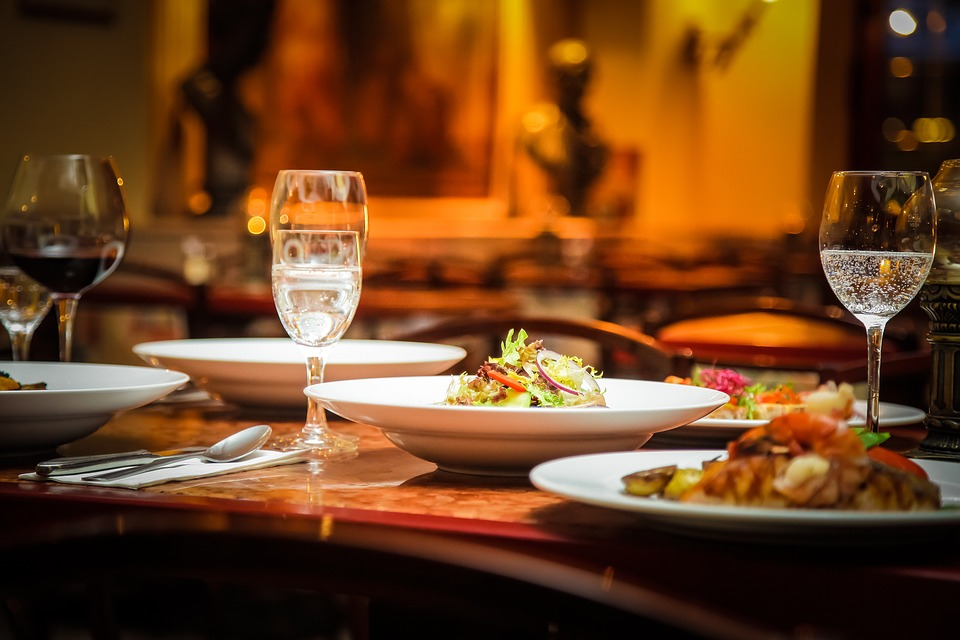

In [1]:
from IPython.display import Image
Image("image.jpg")

## <font color='grey'>Dataset and it's features.</font>
We have taken the dataset 
- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant 
- Country Code: Country in which restaurant is located 
- City: City in which restaurant is located 
- Address: Address of the restaurant
- Locality: Location in the city 
- Locality Verbose: Detailed description of the locality 
- Longitude: Longitude coordinate of the restaurant's location 
- Latitude: Latitude coordinate of the restaurant's location 
- Cuisines: Cuisines offered by the restaurant 
- Average Cost for two: Cost for two people in different currencies
- Currency: Currency of the country 
- Has Table booking: yes/no 
- Has Online delivery: yes/ no 
- Is delivering: yes/ no 
- Switch to order menu: yes/no 
- Price range: range of price of food 
- Aggregate Rating: Average rating out of 5 
- Stars: Number of Stars out of 5
- Rating Date: The Date the rating was given 
- Rating color: depending upon the average rating color 
- Rating text: text on the basis of rating of rating Votes: Number of ratings casted by people

### Importing the libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [3]:
df = pd.read_csv('/Users/saurabhkarambalkar/Desktop/Restaurant_Data/data.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Review,Liked
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,...,No,No,No,3,5,Dark Green,Good,314,Wow... Loved this place.,Yes
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,...,No,No,No,3,5,Dark Green,Bad,591,Crust is not good.,No
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,No,No,No,4,4,Green,Bad,270,Not tasty and the texture was just nasty.,No
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,4,5,Dark Green,Good,365,Stopped by during the late May bank holiday of...,Yes
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,...,No,No,No,4,5,Dark Green,Good,229,The selection on the menu was great and so wer...,Yes


### Analysing the dataset


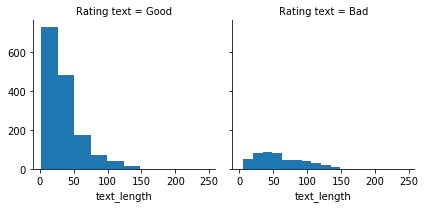

In [4]:
df['text_length'] = df.Review.apply(len)
g = sns.FacetGrid(df, col="Rating text")
g = g.map(plt.hist, "text_length")

#### We observe that the texts which are rated as 'good' are more in length than the ones which are rated as 'bad'.

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


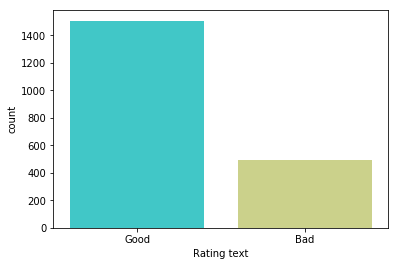

In [5]:
sns.countplot(x='Rating text',data=df,palette='rainbow')

#### The number of 'good' rated texts are more than the 'bad' rated texts.

#### We import a new dataset which contains the details regarding the countries and their codes.

In [6]:
df_CC = pd.read_excel('Country-Code.xlsx')
df_CC.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


#### Grouping the data to take insights.

In [7]:
df_grp = df.groupby(['Country Code'], as_index=False).count()[['Country Code', 'Restaurant ID']]
df_grp.columns = ['Country Code', 'No of Restaurant']
res = df_grp.join(df_CC.set_index('Country Code'), on = 'Country Code')

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


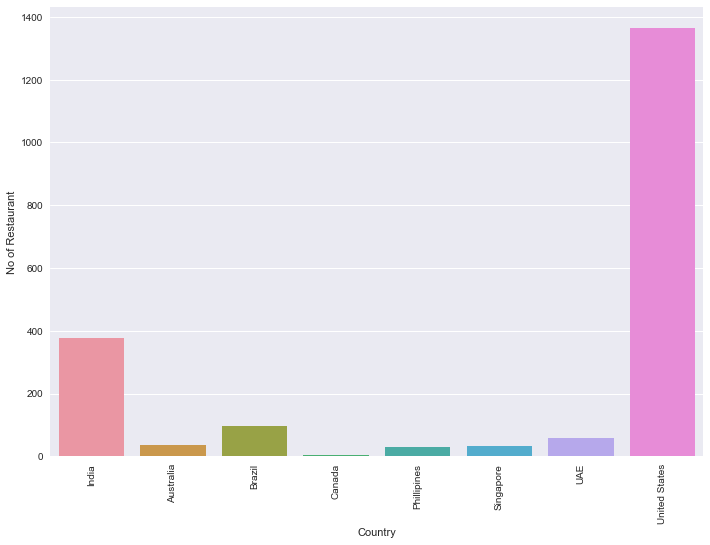

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(res['Country'], res['No of Restaurant'])
plt.xticks(rotation = 90)
plt.show()

#### The above graph on number of restaurants registered on the app based on countries shows that the United States tops the list, followed by India.

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


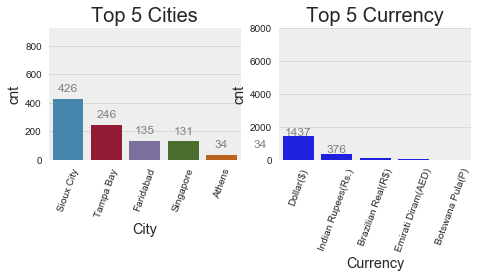

In [9]:
with plt.style.context('bmh'):
   
    cnt = df['Country Code'].value_counts().to_frame()
    ax = plt.subplot2grid((3,3),(2,0))
    cnt = df['City'].value_counts().reset_index()
    cnt.rename(columns = {'index':'City', 'City':'cnt'}, inplace = True)
    sns.barplot(x = 'City', y = 'cnt', data = cnt.head(5), ax = ax)
    ax.tick_params(axis='x', rotation=70)
    ax.set_title('Top 5 Cities', size = 20)
    ax.set_ylim([0, cnt['cnt'].head(1).values+500])
    for i, val in enumerate(cnt['cnt'].head(6)):
        ax.text(i, val+50, val, color = 'grey', ha = 'center')
        
    ax = plt.subplot2grid((3,3),(2,1))
    cnt = df['Currency'].value_counts().reset_index()
    cnt.rename(columns = {'index':'Currency', 'Currency':'cnt'}, inplace = True)
    sns.barplot(x = 'Currency', y = 'cnt', data =cnt.head(5), color = 'b', ax = ax)
    ax.set_title('Top 5 Currency', size = 20)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylim([0, 8000])
    for i, val in enumerate(cnt['cnt'].head(2)):
        ax.text(i, val+50, val, color = 'grey', ha = 'center')
    sns.despine(left=True, bottom=True)
    plt.show()

#### The top 5 cities having maximum restaurants registered on the app is shown in the left graph. The top 5 currencies in which revenue is earned is shown in the right graph.

### Data Pre-processing

In [10]:
cleanup_cols = {"Has Online delivery":{"No": 0, "Yes": 1},
                "Has Table booking":{"No": 0, "Yes": 1},
                "Is delivering now":{"No": 0, "Yes": 1},
                "Liked":{"No":0, "Yes":1},
                "Switch to order menu":{"No": 0, "Yes": 1}}


df.replace(cleanup_cols, inplace=True)

#### We will predict whether the customer likes the restaurants based on the reviews. It will give us an idea if the customer will return or not.

### Natural Language Processing

In [11]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saurabhkarambalkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
corpus = []
for i in range(0,2001):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()  # Taking roots of different versions of the same word; 
                          # Not to have too many words in the end; 
                          # To regroup same versions of the words;
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [13]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'like final blow',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could

In [14]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 21].values

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 84,  13],
       [112, 192]])

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6882793017456359

#### We get an accuracy of 77% which says if the customer will like the restaurant or not based on the reviews.

#### Now, we will see whether the customer likes the restaurant based on the price and the ratings.

In [21]:
X = df.iloc[:,[15,16]].values
y = df.iloc[:,21].values

In [22]:
from sklearn.utils import shuffle
shuffle(df)
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## We will train our data on different classification models to check which model gives us the maximum accuracy
1. LDA
2. Gaussian NB
3. Logistic Regression
4. KNN
5. Random Forest

In [24]:
# Import necessary models from scikit_learn

from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Prepare configuration for cross validation test harness
seed = 123

In [26]:
# Prepare models

models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('LOG',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('RF',RandomForestClassifier()))

In [27]:
# Evaluate each model

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LDA: 0.725729 (0.237966)
NB: 0.731726 (0.260818)
LOG: 0.729729 (0.237499)
KNN: 0.584704 (0.149398)
RF: 0.733729 (0.261968)


#### We observe that Random Forest and Gaussian Naive Bayes model suits best for our data so we will try fitting them to our training set and check their accuracies.

### Fitting Naive Bayes to the training set

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 28,  83],
       [ 12, 278]])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.76309226932668328

### Random Forest Classification to the training set

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 24,  87],
       [ 10, 280]])

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.75810473815461343

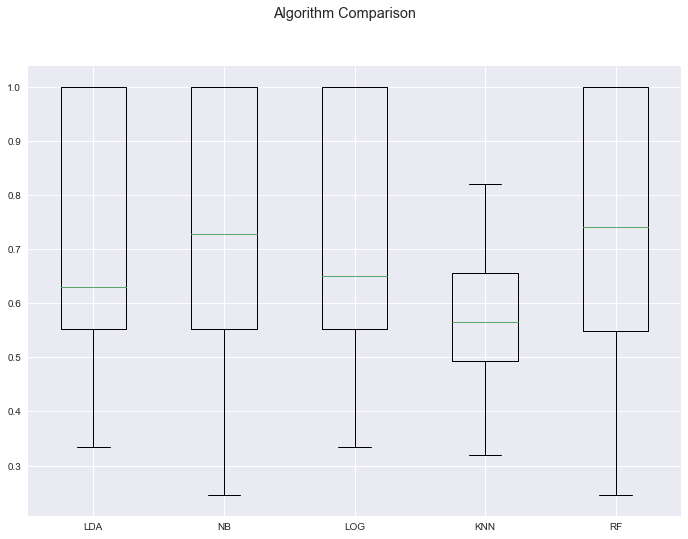

In [36]:
# Boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### We get the highest accuracy for the Gaussian Naive Bayes model with 76.30%

#### Further, we will move on to analysing the texts given in our Reviews column.

### Sentiment Analysis

In [37]:
import json
from pandas.io.json import json_normalize

In [38]:
import textblob as tb
from textblob import TextBlob

In [39]:
!python -m textblob.download_corpora

/usr/local/opt/python@2/bin/python2.7: No module named textblob


In [40]:
reviews=df['Review']

In [41]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saurabhkarambalkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
for i in range(0, 2000):
    review_clean = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review_clean = review_clean.lower()
    review_clean = review_clean.split()
    ps = PorterStemmer()
    review_clean = [ps.stem(word) for word in review_clean if not word in set(stopwords.words('english'))]
    review_clean = ' '.join(review_clean)
    corpus.append(review_clean)

In [43]:
#for fetching all reviews
#list=[]
#list= dataframe_final['Review']
wordstring = corpus[0]

In [44]:
n=1
while n < 2000:
    wordstring += corpus[n]
    n=n+1

In [45]:
wordstring #displays all reviews combined

'wow love placecrust goodtasti textur nastistop late may bank holiday rick steve recommend loveselect menu great priceget angri want damn phohoneslti tast freshpotato like rubber could tell made ahead time kept warmerfri greatgreat touchservic promptwould go backcashier care ever say still end wayyy overprtri cape cod ravoli chicken cranberri mmmmdisgust pretti sure human hairshock sign indic cashhighli recommendwaitress littl slow servicplace worth time let alon vegalikeburritto blahfood amazservic also cutecould care less interior beautiperformright red velvet cake ohhh stuff goodlike final blowhole wall great mexican street taco friendli stafftook hour get food tabl restaur food luke warm sever run around like total overwhelmworst salmon sashimialso combo like burger fri beer decent deallike final blowfound place accid could happierseem like good quick place grab bite familiar pub food favor look elsewheroveral like place lotredeem qualiti restaur inexpensampl portion good pricepoor

In [46]:
wordlist = wordstring.split()
wordlist

['wow',
 'love',
 'placecrust',
 'goodtasti',
 'textur',
 'nastistop',
 'late',
 'may',
 'bank',
 'holiday',
 'rick',
 'steve',
 'recommend',
 'loveselect',
 'menu',
 'great',
 'priceget',
 'angri',
 'want',
 'damn',
 'phohoneslti',
 'tast',
 'freshpotato',
 'like',
 'rubber',
 'could',
 'tell',
 'made',
 'ahead',
 'time',
 'kept',
 'warmerfri',
 'greatgreat',
 'touchservic',
 'promptwould',
 'go',
 'backcashier',
 'care',
 'ever',
 'say',
 'still',
 'end',
 'wayyy',
 'overprtri',
 'cape',
 'cod',
 'ravoli',
 'chicken',
 'cranberri',
 'mmmmdisgust',
 'pretti',
 'sure',
 'human',
 'hairshock',
 'sign',
 'indic',
 'cashhighli',
 'recommendwaitress',
 'littl',
 'slow',
 'servicplace',
 'worth',
 'time',
 'let',
 'alon',
 'vegalikeburritto',
 'blahfood',
 'amazservic',
 'also',
 'cutecould',
 'care',
 'less',
 'interior',
 'beautiperformright',
 'red',
 'velvet',
 'cake',
 'ohhh',
 'stuff',
 'goodlike',
 'final',
 'blowhole',
 'wall',
 'great',
 'mexican',
 'street',
 'taco',
 'friendli',


In [47]:
blob=TextBlob(wordstring)

In [48]:
Fos=blob.tags

In [49]:
labels=['Words','Figure of Speech']
df1= pd.DataFrame.from_records(Fos, columns=labels)
df1.head()


,Words,Figure of Speech
0,wow,NN
1,love,VB
2,placecrust,NN
3,goodtasti,NN
4,textur,JJ


In [50]:
blob.sentences[0].words

WordList(['wow', 'love', 'placecrust', 'goodtasti', 'textur', 'nastistop', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommend', 'loveselect', 'menu', 'great', 'priceget', 'angri', 'want', 'damn', 'phohoneslti', 'tast', 'freshpotato', 'like', 'rubber', 'could', 'tell', 'made', 'ahead', 'time', 'kept', 'warmerfri', 'greatgreat', 'touchservic', 'promptwould', 'go', 'backcashier', 'care', 'ever', 'say', 'still', 'end', 'wayyy', 'overprtri', 'cape', 'cod', 'ravoli', 'chicken', 'cranberri', 'mmmmdisgust', 'pretti', 'sure', 'human', 'hairshock', 'sign', 'indic', 'cashhighli', 'recommendwaitress', 'littl', 'slow', 'servicplace', 'worth', 'time', 'let', 'alon', 'vegalikeburritto', 'blahfood', 'amazservic', 'also', 'cutecould', 'care', 'less', 'interior', 'beautiperformright', 'red', 'velvet', 'cake', 'ohhh', 'stuff', 'goodlike', 'final', 'blowhole', 'wall', 'great', 'mexican', 'street', 'taco', 'friendli', 'stafftook', 'hour', 'get', 'food', 'tabl', 'restaur', 'food', 'luke', 'warm',

In [51]:
blob.noun_phrases
nouns=[]

In [52]:
for word,tag in blob.tags:
    if tag == 'NN':
        nouns.append(word)

In [53]:
counter = {}
for i in nouns: 
    counter[i] = counter.get(i, 0) + 1
counter
POPULARwords= sorted([ (freq,word) for word, freq in counter.items() ], reverse=True)[:30]

In [54]:
labels=['Count','Words']
popular_words= pd.DataFrame.from_records(POPULARwords, columns=labels)
popular_words.head()

,Count,Words
0,191,food
1,79,place
2,51,time
3,26,restaur
4,21,servic


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


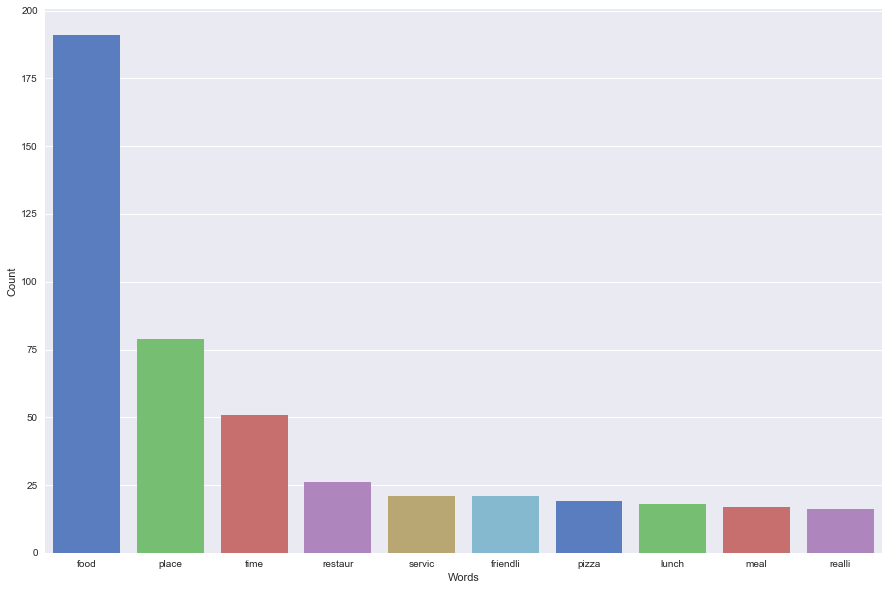

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10)) # defining the size of figure
sns.barplot(x='Words', y='Count', data=popular_words.head(10),palette='muted',
 ax=ax) 
plt.show(fig)

#### The above graph gives us an insight of most commonly used words in our reviews.

## Verbs

In [56]:
verbs=[]

In [57]:
for word,tag in blob.tags:
    if tag == 'VB':
        verbs.append(word)
        

In [58]:
counter = {}
for i in verbs: 
    counter[i] = counter.get(i, 0) + 1
counter

POPULARverbs= sorted([ (freq,word) for word, freq in counter.items() ], reverse=True)[:30]

In [59]:
labels=['Count','Words']
popular_verbs= pd.DataFrame.from_records(POPULARverbs, columns=labels)
popular_verbs.head()

,Count,Words
0,21,go
1,15,get
2,7,recommend
3,6,love
4,5,find


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


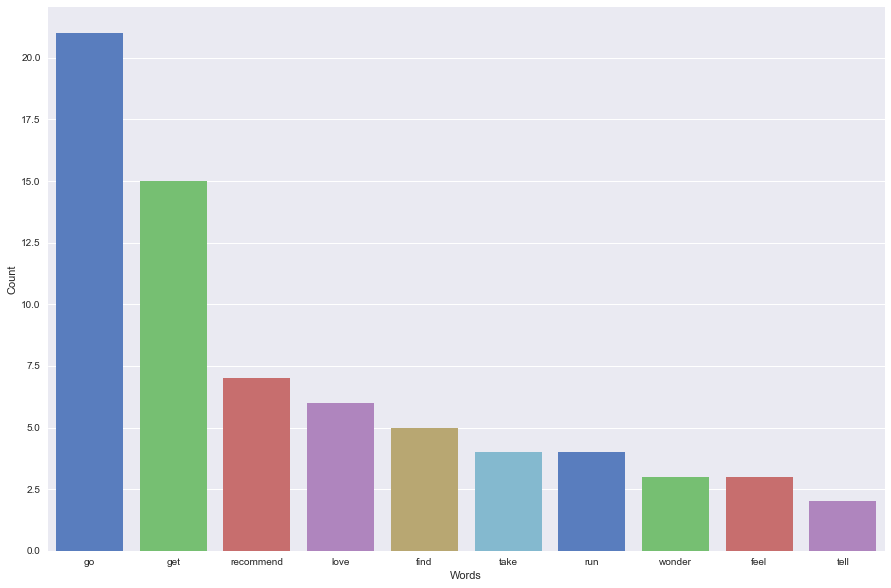

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10)) # defining the size of figure
sns.barplot(x='Words', y='Count', data=popular_verbs.head(10),palette='muted',
 ax=ax) 
plt.show(fig)

#### The above graph gives us an idea of commonly used verbs.

In [61]:
blob.sentiment 

Sentiment(polarity=0.27729345535133143, subjectivity=0.5232432063428488)

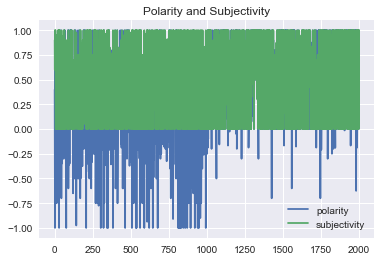

In [62]:
import matplotlib.pyplot as plot
%matplotlib inline
polarity=[]
subj=[]
for t in reviews:
    tx=TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

    
poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})   
poltweet.plot(title='Polarity and Subjectivity')

## At the end, we can conclude that analysis of the reviews gives us an idea about the likes and dislikes of the customers which when imporvised can lead to increase in the revenue of the restaurants.